ValueError: Improper transfer function. `num` is longer than `den`.

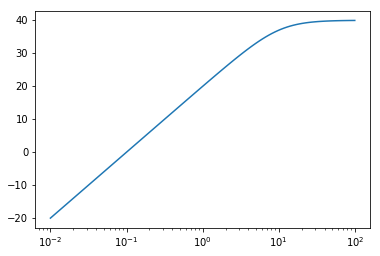

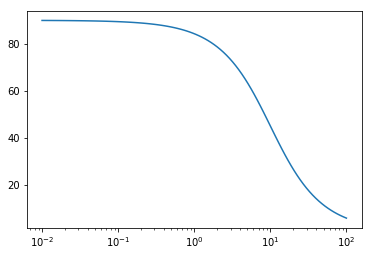

In [5]:
#Bode Plots Generator
from scipy import signal
import matplotlib.pyplot as plt
from sympy.integrals.transforms import laplace_transform
from sympy import *
import sympy as sympy
from sympy.abc import a, t, x, s, X, g, G

#This tutorial explores using the python routines for solving partial fraction expansion and bode plots.  
#Using tutorial 5, please provide plots for the following:
#1) bode plot,  for both amplitude and phase
#2) find impulse response, plot in time
#3) find step response, plot in time and frequency
#4) if input is a sinusoid, plot the output in time for 3 distinctive frequencies 
#(make note on why you chose these 3 distinctive frequencies)
#5) Provide an equivalent differential equation for the Laplace transfer function

#Functions needed to perform 1-5 on
#highest degree of x to lowest degree of x
sig = []

sig.append(signal.lti([100, 0], [1, 10]))
#sig.append(signal.lti([0.4, 40, 1000], [1, 0, 0]))
#sig.append(signal.lti([80, 40], [50, 10]))
#sig.append(signal.lti([5, 120, 400], [1]))
#sig.append(signal.lti([30, 300], [4, 2400, 200000]))
#sig.append(signal.lti([100, 0], [5, 1100, 70000, 1000000]))
#sig.append(signal.lti([2, 200], [5, 5050, 50000]))

w = []
mag = []
phase = []

#Part 1 - Bode Plot for Amplitude and Phase
for i in [0, 6]:
    w_temp, mag_temp, phase_temp = signal.bode(sig[i])
    w.append(w_temp)
    mag.append(mag_temp)
    phase.append(phase_temp)

plt.figure()
plt.semilogx(w[0], mag[0])
plt.figure()
plt.semilogx(w[0], phase[0])

    
#Part 2 - Plot Impulse Response
time_imp = []
impulse = []

for i in [0, 6]:
    time_imp_temp, impulse_temp = signal.impulse(sig[i])
    time_imp.append(time_imp_temp)
    impulse.append(impulse_temp)

plt.figure()
plt.semilogx(time_imp[0], impulse[0])

#Part 3 - Plot Step Response in Time Domain and Frequency Domain
time_step = []
step = []

#for i in [0, 6]:
    
    
    
    
plt.figure()

plt.show()




--------- Bode Plots ---------
imp:  0.48*exp(0.2*t)*Heaviside(t)
step (time):  0.48*exp(0.2*t)*DiracDelta(t) + 0.096*exp(0.2*t)*Heaviside(t)
y1_t:  0.48*exp(0.2*t)*sin(10*t)*Heaviside(t)
y2_t:  0.48*exp(0.2*t)*sin(10*t)*Heaviside(t)
y3_t:  0.48*exp(0.2*t)*sin(10*t)*Heaviside(t)


C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:898: RuntimeWarning: divide by zero encountered in double_scalars
  scale = 1. / v[0]
C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:904: RuntimeWarning: invalid value encountered in multiply
  r[k:k+n+1] -= d*v


imp:  InverseLaplaceTransform(nan, s, t, _None)
step (time):  Derivative(InverseLaplaceTransform(nan, s, t, _None), t)
y1_t:  InverseLaplaceTransform(nan, s, t, _None)*sin(10*t)
y2_t:  InverseLaplaceTransform(nan, s, t, _None)*sin(10*t)
y3_t:  InverseLaplaceTransform(nan, s, t, _None)*sin(10*t)
imp:  -0.0624999999999999*exp(20.0*t)*Heaviside(t) + 25.0625*exp(100.0*t)*Heaviside(t)
step (time):  -0.0624999999999999*exp(20.0*t)*DiracDelta(t) - 1.25*exp(20.0*t)*Heaviside(t) + 25.0625*exp(100.0*t)*DiracDelta(t) + 2506.25*exp(100.0*t)*Heaviside(t)
y1_t:  (-0.0624999999999999*exp(20.0*t)*Heaviside(t) + 25.0625*exp(100.0*t)*Heaviside(t))*sin(10*t)
y2_t:  (-0.0624999999999999*exp(20.0*t)*Heaviside(t) + 25.0625*exp(100.0*t)*Heaviside(t))*sin(10*t)
y3_t:  (-0.0624999999999999*exp(20.0*t)*Heaviside(t) + 25.0625*exp(100.0*t)*Heaviside(t))*sin(10*t)
[80, 40]
[50, 10]
[5, 120, 400]
[0, 1, 0]
[100, 0]
[5, 1100, 70000, 1000000]


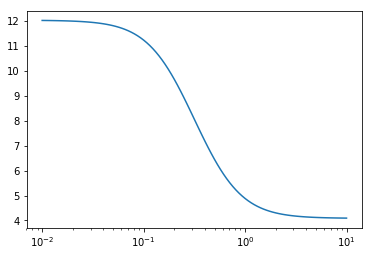

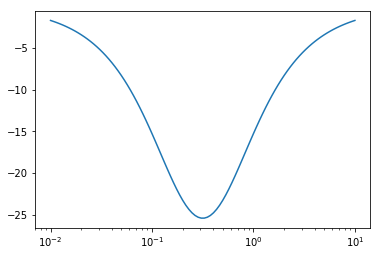

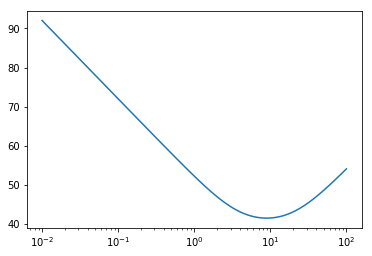

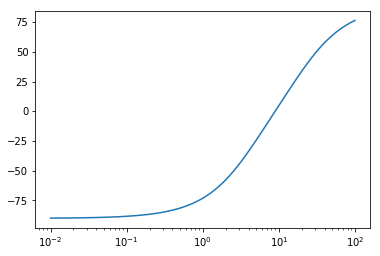

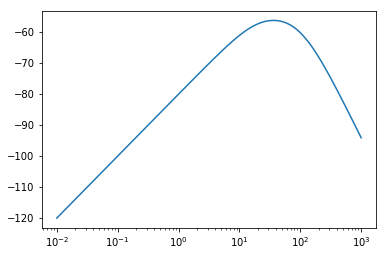

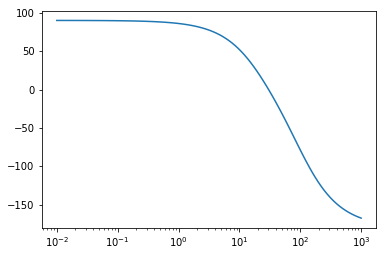

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
#Bode Plots Generator
from scipy import signal
import matplotlib.pyplot as plt
from sympy.integrals.transforms import laplace_transform
from sympy.integrals.transforms import inverse_laplace_transform
from sympy import *
import sympy as sympy
from sympy.abc import a, t, x, s, X, g, G
import numpy as np

#Functions needed to perform 1-5 on
#highest degree of s to lowest degree of s
#*****Please only Use a few at a time w/ greater than 20 plots Jupyter begins to crash*****
sig = [
    #[[100, 0], [1,10]],
    #[[0.4, 40, 1000], [1, 0, 0]],
    [[80, 40], [50, 10]],
    [[5, 120, 400], [0, 1, 0]],
    #[[30, 300], [4, 2400, 200000]],
    [[100, 0], [5, 1100, 70000, 1000000]],
    #[[2, 200], [5, 5050, 50000]],
]

#Helper function to transform a transfer function into a time
def Transfer_to_Impulse(numerator, denominator, constant = []):
    equation_total = None
    for i in range(0, len(numerator)):
        equation_temp = ((numerator[i]) / (s + denominator[i]))
        if equation_total is None:
            equation_total = inverse_laplace_transform(equation_temp, s, t)
        else:
            equation_total += inverse_laplace_transform(equation_temp, s, t)
    return equation_total

def Transfer_to_Divisor(constants = []):
    print(constants)
    
#Helper function to transform a function to an array of values for plotting
def Transfer_to_Plotable(function):
    transformed = function
    return transformed

#Bode Plots of each function
print("--------- Bode Plots ---------")
for system in sig:
    w, mag, phase = signal.bode(signal.lti(system[0], system[1]))
    plt.figure()
    plt.semilogx(w, mag)
    plt.figure()
    plt.semilogx(w, phase)

#Plot Impulse Response, Step Response, System input as sinusoids
for system in sig:
    #Impulse Response
    real, pole, coeff = signal.residue(system[0], system[1])
    impulse = Transfer_to_Impulse(real, pole, coeff)
    print("imp: ", impulse)
    plt.figure()
    
    #Step Response
    step = diff(impulse, t)
    print("step (time): ", step)
    #Unable to perform this operation as the sympy library cannot handle heaviside funcitons
    #step_freq = laplace_transform(step, t, s)
    #print("step (freq): ", step_freq)
    
    #System Input as sinusoids (3 distinctive frequencies)
    w_1 = 10
    w_2 = 100
    w_3 = 1000
    y_1 = sin(w_1*t)*impulse
    print("y1_t: ", y_1)
    y_2 = sin(w_1*t)*impulse
    print("y2_t: ", y_1)
    y_3 = sin(w_1*t)*impulse
    print("y3_t: ", y_1)
    
#ODE as output from Transfer Function
for system in sig:
    #take the Inverse Laplace Transform of X(s)*N(s) and Y(s)*D(s) and equate the two outputing
    y_of_s = Transfer_to_Divisor(system[0])
    x_of_s = Transfer_to_Divisor(system[1])
    #left = inverse_laplace_transform(, s, t)

plt.show()


Transfer Function:  (2*s + 200)/(5*s**2 + 5050*s + 50000)
ODE: 5dx^2/dt^2 + 5050dx/dt + 50000x = 2dy/dt + 200y 


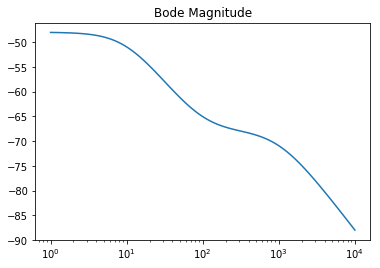

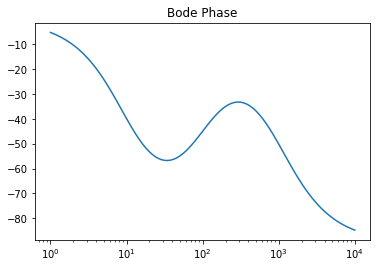

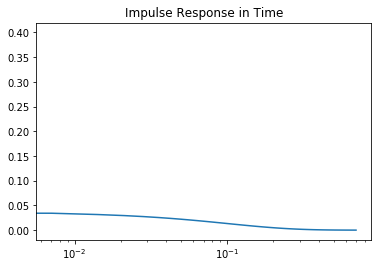

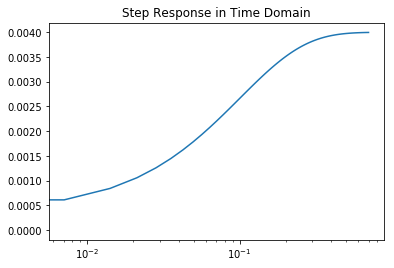

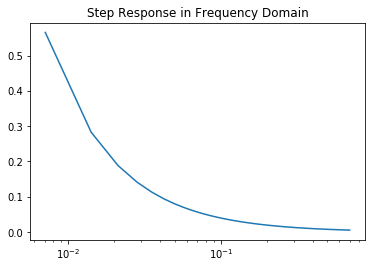

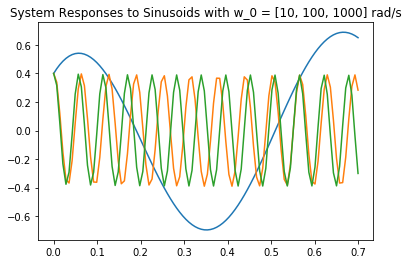

In [86]:
#Bode Plots Generator
from scipy import signal
import matplotlib.pyplot as plt
from sympy.integrals.transforms import laplace_transform
from sympy import *
import sympy as sympy
from sympy.abc import a, t, x, s, X, g, G

#This tutorial explores using the python routines for solving partial fraction expansion and bode plots.  
#Using tutorial 5, please provide plots for the following:
#1) bode plot,  for both amplitude and phase
#2) find impulse response, plot in time
#3) find step response, plot in time and frequency
#4) if input is a sinusoid, plot the output in time for 3 distinctive frequencies 
#(make note on why you chose these 3 distinctive frequencies)
#5) Provide an equivalent differential equation for the Laplace transfer function

#Functions needed to perform 1-5 on
#highest degree of x to lowest degree of x
sig = [
    [[100, 0], [1,10]],
    [[0.4, 40, 1000], [1, 0, 0]],
    [[80, 40], [50, 10]],
    [[5, 120, 400], [1, 0]],
    [[30, 300], [4, 2400, 200000]],
    [[100, 0], [5, 1100, 70000, 1000000]],
    [[2, 200], [5, 5050, 50000]],
]

i = 6

#helper function to create a sinusoid to plot
def cosine(amp, freq, phs, x):
    return amp*(np.cos((freq*x)-phs))

#helper function which will intake a transfer function and output the step response
def step_response_frequency(numerator, denominator, frequencies):
    equation_total_numerator = None
    equation_total_denominator = None
    for i in range(0, len(numerator)):
        if equation_total_numerator == None:
            equation_total_numerator = numerator[i]*s**(len(numerator)-i-1)
        else:
            equation_total_numerator += numerator[i]*s**(len(numerator)-i-1)
    for j in range(0, len(denominator)):
        if equation_total_denominator == None:
            equation_total_denominator = denominator[j]*s**(len(denominator)-j-1)
        else:
            equation_total_denominator += denominator[j]*s**(len(denominator)-j-1)
    equation_total = equation_total_numerator/(s*equation_total_denominator)
    print("Transfer Function: ", equation_total*s)
    step_response = []
    for freq in frequencies:
        step_response.append(equation_total.subs(s, freq))
    return step_response

#Helper function for making ODE from transfer function
def transfer_to_ODE(numerator, denominator):
    equation_total_x = None
    equation_total_y = None
    for i in range(0, len(numerator)):
        if equation_total_y == None:
            if len(numerator)-i-1 == 0:
                equation_total_y = str(numerator[i]) + "y "
            elif len(numerator)-i-1 == 1:
                equation_total_y = str(numerator[i]) + "dy/dt "
            else:
                equation_total_y = str(numerator[i]) + "dy^" + str(len(numerator)-i-1) + "/dt^" + str(len(numerator)-i-1) + " "
        else:
            if len(numerator)-i-1 == 0:
                equation_total_y += str(numerator[i]) + "y "
            elif len(numerator)-i-1 == 1:
                equation_total_y += str(numerator[i]) + "dy/dt "
            else:
                equation_total_y += str(numerator[i]) + "dy^" + str(len(numerator)-i-1) + "/dt^" + str(len(numerator)-i-1) + " "
        if i != len(numerator)-1:
            equation_total_y += "+ "
    for j in range(0, len(denominator)):
        if equation_total_x == None:
            if len(denominator)-j-1 == 0:
                equation_total_x = str(denominator[j]) + "x "
            elif len(denominator)-j-1 == 1:
                equation_total_x = str(denominator[j]) + "dx/dt "
            else:
                equation_total_x = str(denominator[j]) + "dx^" + str(len(denominator)-j-1) + "/dt^" + str(len(denominator)-j-1) + " "
        else:
            if len(denominator)-j-1 == 0:
                equation_total_x += str(denominator[j]) + "x "
            elif len(denominator)-j-1 == 1:
                equation_total_x += str(denominator[j]) + "dx/dt "
            else:
                equation_total_x += str(denominator[j]) + "dx^" + str(len(denominator)-j-1) + "/dt^" + str(len(denominator)-j-1) + " " 
        if j != len(denominator)-1:
            equation_total_x += "+ "
    return equation_total_x + "= " + equation_total_y 
    
    

#Part 1 - Bode Plot for Amplitude and Phase
w, mag, phase = signal.bode(signal.lti(sig[i][0], sig[i][1]))
plt.figure()
plt.semilogx(w, mag)
plt.title("Bode Magnitude")
plt.figure()
plt.semilogx(w, phase)
plt.title("Bode Phase")

#Part 2 - Plot Impulse Response
time_imp, impulse = signal.impulse(signal.lti(sig[i][0], sig[i][1]))
plt.figure()
plt.semilogx(time_imp, impulse)
plt.title("Impulse Response in Time")

#Part 3 - Plot Step Response in Time Domain and Frequency Domain
#Time Domain
time_step, step = signal.step(signal.lti(sig[i][0], sig[i][1]))
plt.figure()
plt.semilogx(time_step, step)
plt.title("Step Response in Time Domain")
#Frequency Domain - H(s)X(s) = Y(s) where X(s) = u(s)
step_freq = step_response_frequency(sig[i][0], sig[i][1], time_step)
plt.figure()
plt.semilogx(time_step, step_freq)
plt.title("Step Response in Frequency Domain")

#Part 4 - If Input is a sinusoid plot 3 distinct frequencies
#H(s)X(s) = Y(s) --> h(t)*x(t) = y(t) where x(t) = cos(wt + phi)
#select the frequencies of 10, 100, 1000 as these are the decade points
w_0 = [10, 100, 1000]
plt.figure()
for omega in w_0:
    convolution = signal.convolve(cosine(1, omega, 0, time_imp), impulse)
    truncate_convolution = convolution[0:100]
    plt.plot(time_imp, truncate_convolution)
    plt.title("System Responses to Sinusoids with w_0 = [10, 100, 1000] rad/s")

#Part 5 - Transfer to ODE
#Take the Inverse Laplace Transform of X(s)N(s) and Y(s)D(s) and equate the two outputing back
#N(s) is sig[i][0] and D(s) is sig[i][1]
print("ODE: " + transfer_to_ODE(sig[i][0], sig[i][1]))


plt.show()


Transfer Function:  100*s/(s + 10)
ODE: 1dx/dt + 10x = 100dy/dt + 0y 


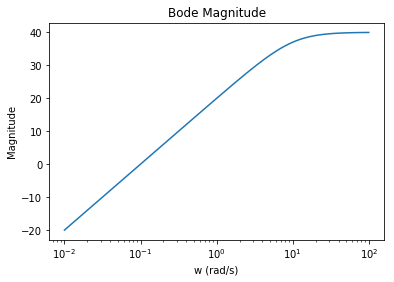

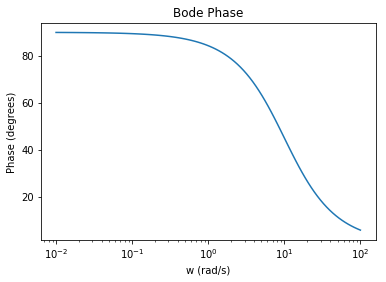

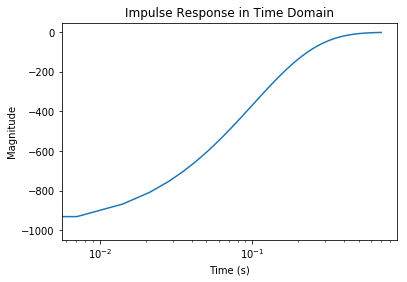

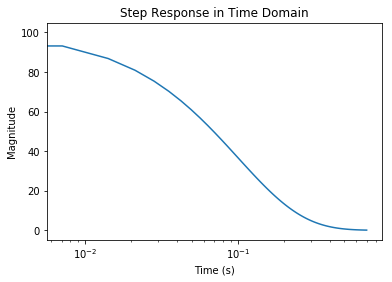

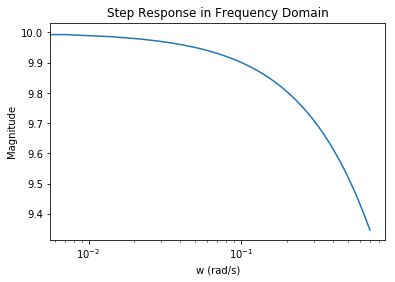

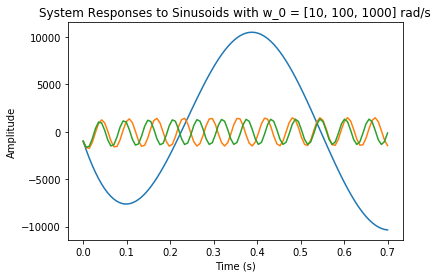

Transfer Function:  (0.4*s**2 + 40*s + 1000)/s**2
ODE: 1dx^2/dt^2 + 0dx/dt + 0x = 0.4dy^2/dt^2 + 40dy/dt + 1000y 


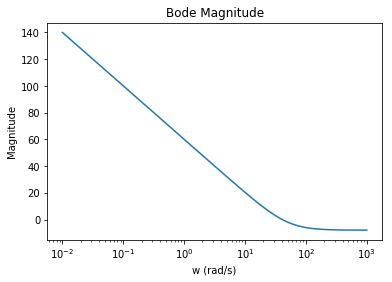

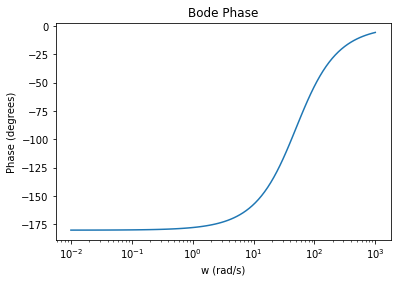

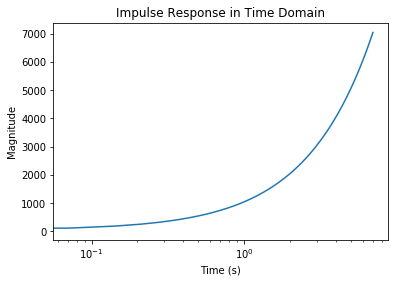

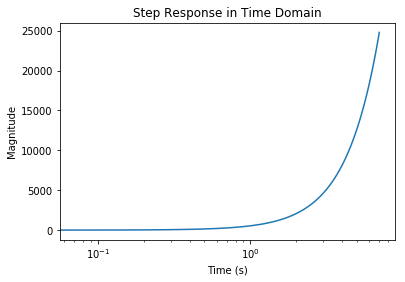

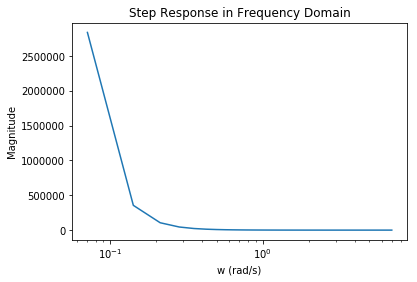

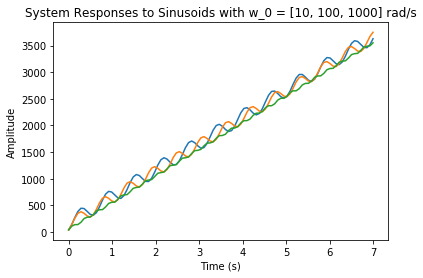

Transfer Function:  (80*s + 40)/(50*s + 10)
ODE: 50dx/dt + 10x = 80dy/dt + 40y 


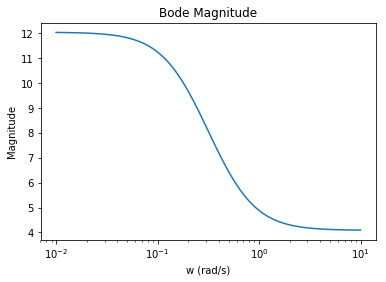

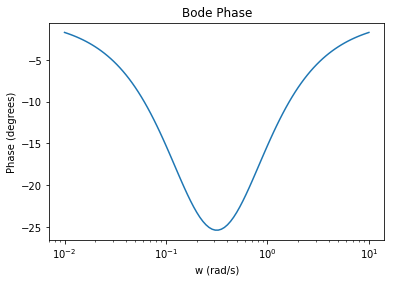

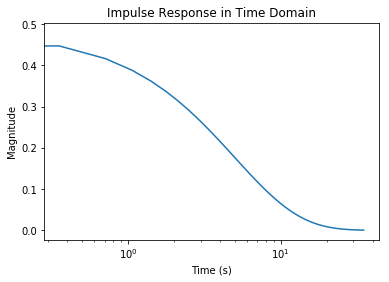

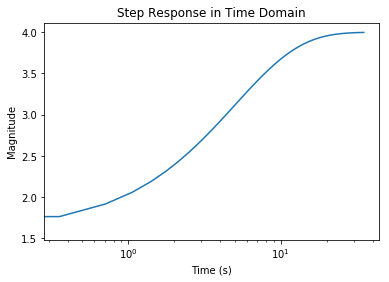

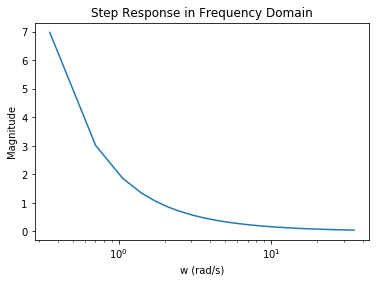

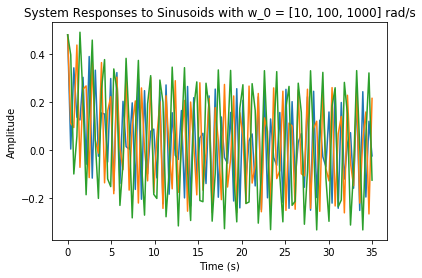

Transfer Function:  (30*s + 300)/(4*s**2 + 2400*s + 200000)
ODE: 4dx^2/dt^2 + 2400dx/dt + 200000x = 30dy/dt + 300y 


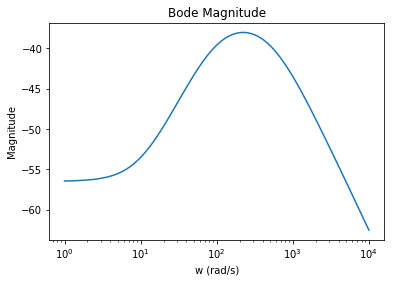

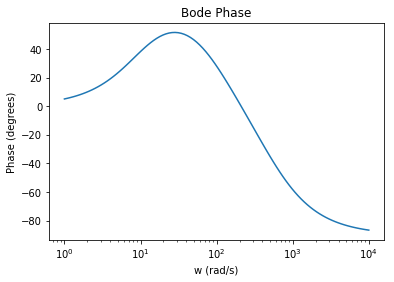

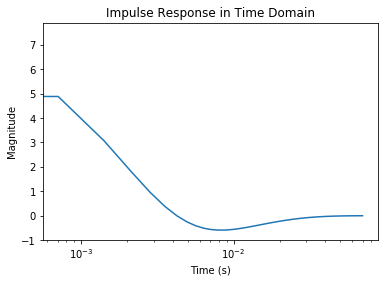

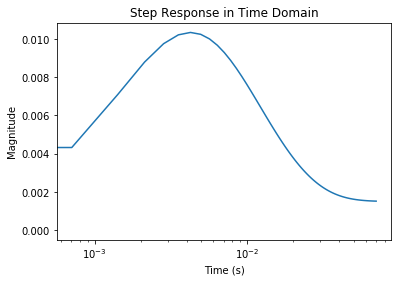

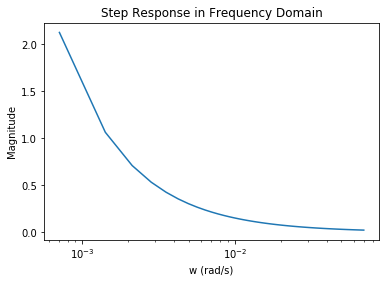

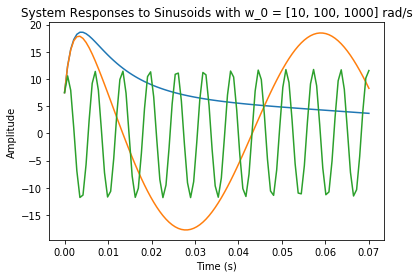

Transfer Function:  100*s/(5*s**3 + 1100*s**2 + 70000*s + 1000000)
ODE: 5dx^3/dt^3 + 1100dx^2/dt^2 + 70000dx/dt + 1000000x = 100dy/dt + 0y 


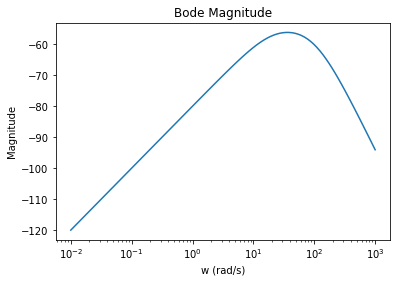

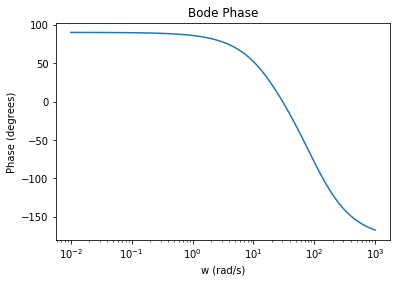

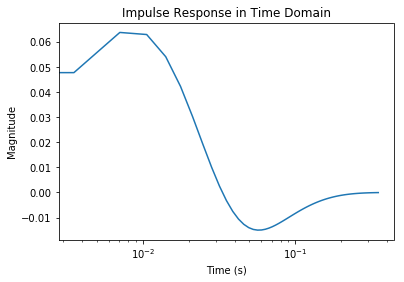

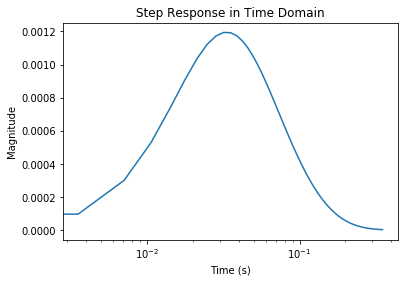

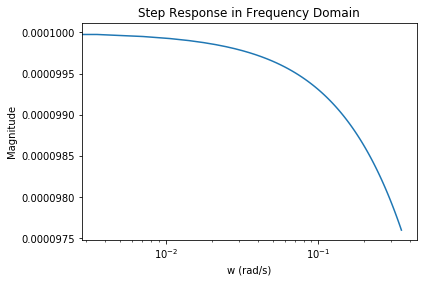

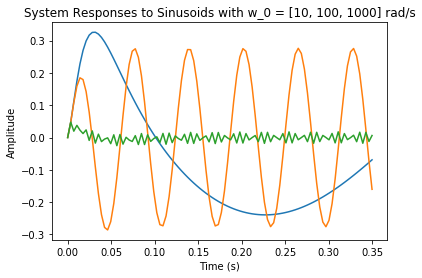

Transfer Function:  (2*s + 200)/(5*s**2 + 5050*s + 50000)
ODE: 5dx^2/dt^2 + 5050dx/dt + 50000x = 2dy/dt + 200y 


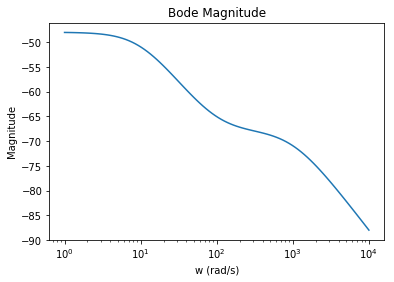

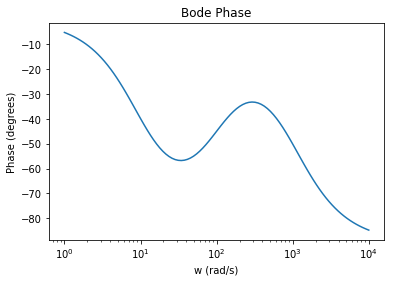

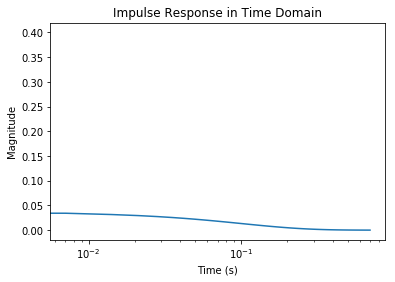

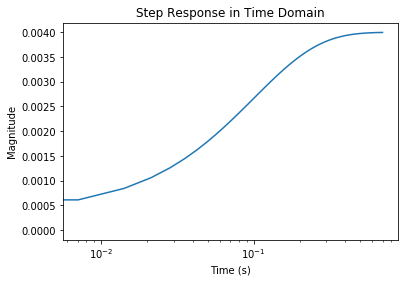

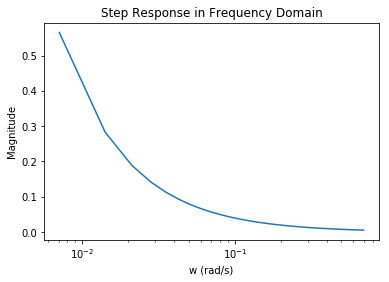

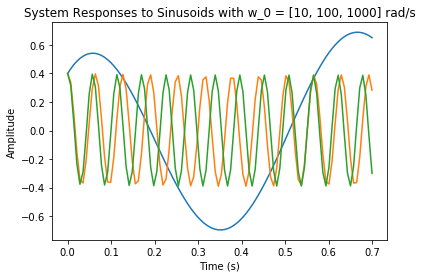

In [90]:
#Bode Plots Generator
from scipy import signal
import matplotlib.pyplot as plt
from sympy.integrals.transforms import laplace_transform
from sympy import *
import sympy as sympy
from sympy.abc import a, t, x, s, X, g, G

#highest degree of x to lowest degree of x
sig = [
    [[100, 0], [1,10]],
    [[0.4, 40, 1000], [1, 0, 0]],
    [[80, 40], [50, 10]],
    #[[5, 120, 400], [1, 0]],
    [[30, 300], [4, 2400, 200000]],
    [[100, 0], [5, 1100, 70000, 1000000]],
    [[2, 200], [5, 5050, 50000]],
]

#helper function to create a sinusoid to plot
def cosine(amp, freq, phs, x):
    return amp*(np.cos((freq*x)-phs))

#helper function which will intake a transfer function and output the step response
def step_response_frequency(numerator, denominator, frequencies):
    equation_total_numerator = None
    equation_total_denominator = None
    for i in range(0, len(numerator)):
        if equation_total_numerator == None:
            equation_total_numerator = numerator[i]*s**(len(numerator)-i-1)
        else:
            equation_total_numerator += numerator[i]*s**(len(numerator)-i-1)
    for j in range(0, len(denominator)):
        if equation_total_denominator == None:
            equation_total_denominator = denominator[j]*s**(len(denominator)-j-1)
        else:
            equation_total_denominator += denominator[j]*s**(len(denominator)-j-1)
    equation_total = equation_total_numerator/(s*equation_total_denominator)
    print("Transfer Function: ", equation_total*s)
    step_response = []
    for freq in frequencies:
        step_response.append(equation_total.subs(s, freq))
    return step_response

#Helper function for making ODE from transfer function
def transfer_to_ODE(numerator, denominator):
    equation_total_x = None
    equation_total_y = None
    for i in range(0, len(numerator)):
        if equation_total_y == None:
            if len(numerator)-i-1 == 0:
                equation_total_y = str(numerator[i]) + "y "
            elif len(numerator)-i-1 == 1:
                equation_total_y = str(numerator[i]) + "dy/dt "
            else:
                equation_total_y = str(numerator[i]) + "dy^" + str(len(numerator)-i-1) + "/dt^" + str(len(numerator)-i-1) + " "
        else:
            if len(numerator)-i-1 == 0:
                equation_total_y += str(numerator[i]) + "y "
            elif len(numerator)-i-1 == 1:
                equation_total_y += str(numerator[i]) + "dy/dt "
            else:
                equation_total_y += str(numerator[i]) + "dy^" + str(len(numerator)-i-1) + "/dt^" + str(len(numerator)-i-1) + " "
        if i != len(numerator)-1:
            equation_total_y += "+ "
    for j in range(0, len(denominator)):
        if equation_total_x == None:
            if len(denominator)-j-1 == 0:
                equation_total_x = str(denominator[j]) + "x "
            elif len(denominator)-j-1 == 1:
                equation_total_x = str(denominator[j]) + "dx/dt "
            else:
                equation_total_x = str(denominator[j]) + "dx^" + str(len(denominator)-j-1) + "/dt^" + str(len(denominator)-j-1) + " "
        else:
            if len(denominator)-j-1 == 0:
                equation_total_x += str(denominator[j]) + "x "
            elif len(denominator)-j-1 == 1:
                equation_total_x += str(denominator[j]) + "dx/dt "
            else:
                equation_total_x += str(denominator[j]) + "dx^" + str(len(denominator)-j-1) + "/dt^" + str(len(denominator)-j-1) + " " 
        if j != len(denominator)-1:
            equation_total_x += "+ "
    return equation_total_x + "= " + equation_total_y 
      
for i in range(0, 6):
    #Part 1 - Bode Plot for Amplitude and Phase
    w, mag, phase = signal.bode(signal.lti(sig[i][0], sig[i][1]))
    plt.figure()
    plt.semilogx(w, mag)
    plt.title("Bode Magnitude")
    plt.xlabel("w (rad/s)")
    plt.ylabel("Magnitude")
    plt.figure()
    plt.semilogx(w, phase)
    plt.title("Bode Phase")
    plt.xlabel("w (rad/s)")
    plt.ylabel("Phase (degrees)")

    #Part 2 - Plot Impulse Response
    time_imp, impulse = signal.impulse(signal.lti(sig[i][0], sig[i][1]))
    plt.figure()
    plt.semilogx(time_imp, impulse)
    plt.title("Impulse Response in Time Domain")
    plt.xlabel("Time (s)")
    plt.ylabel("Magnitude")

    #Part 3 - Plot Step Response in Time Domain and Frequency Domain
    #Time Domain
    time_step, step = signal.step(signal.lti(sig[i][0], sig[i][1]))
    plt.figure()
    plt.semilogx(time_step, step)
    plt.title("Step Response in Time Domain")
    plt.xlabel("Time (s)")
    plt.ylabel("Magnitude")
    #Frequency Domain - H(s)X(s) = Y(s) where X(s) = u(s)
    step_freq = step_response_frequency(sig[i][0], sig[i][1], time_step)
    plt.figure()
    plt.semilogx(time_step, step_freq)
    plt.title("Step Response in Frequency Domain")
    plt.xlabel("w (rad/s)")
    plt.ylabel("Magnitude")

    #Part 4 - If Input is a sinusoid plot 3 distinct frequencies
    #H(s)X(s) = Y(s) --> h(t)*x(t) = y(t) where x(t) = cos(wt + phi)
    #select the frequencies of 10, 100, 1000 as these are the decade points
    w_0 = [10, 100, 1000]
    plt.figure()
    for omega in w_0:
        convolution = signal.convolve(cosine(1, omega, 0, time_imp), impulse)
        truncate_convolution = convolution[0:100]
        plt.plot(time_imp, truncate_convolution)
    plt.title("System Responses to Sinusoids with w_0 = [10, 100, 1000] rad/s")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    #Part 5 - Transfer to ODE
    #Take the Inverse Laplace Transform of X(s)N(s) and Y(s)D(s) and equate the two outputing back
    #N(s) is sig[i][0] and D(s) is sig[i][1]
    print("ODE: " + transfer_to_ODE(sig[i][0], sig[i][1]))
    plt.show()
